###Import file

In [1]:
import numpy as np
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1mWTtK5vSSUj6yVtHHTd7PVsvlUxwhDuN"})
downloaded.GetContentFile('train.csv') 
train = pd.read_csv('train.csv') 
downloaded = drive.CreateFile({'id':"16XJefNgSgeR3ceERTjk_dDSJI7-P4UbE"})
downloaded.GetContentFile('test.csv') 
test = pd.read_csv('test.csv') 
train = train.drop(str(train.columns[0]),axis=1)
test = test.drop(str(test.columns[0]),axis=1)

In [2]:
train

,condition,review
0,1,"""Works every time."""
1,1,"""My Dr. prescribed this after 80mg of Nexium s..."
2,0,"""Since being diagnosed with Epilepsy I was put..."
3,0,"""I love this birth control because no spotting..."
4,1,"""I have been on this medication for a couple o..."
...,...,...
987,1,"""I&#039;ve been on Protonix for 2 weeks and fe..."
988,1,"""I was prescribed this for GERD caused by gast..."
989,1,"""This drug has been more effective than Axid,,..."
990,1,"""zantac worked somewhat with my chronic reflux..."


In [3]:
train['review'][550]

'"Doctor gave me this drug saying that it will help for ulcer, it did not help, pain is still unbearable, but I do not have reflux, which makes it a little bit better."'

In [4]:
train['condition'][550]

1

In [5]:
train['review'][27]

'"Bone Spur with Osteoarthritis and severe pain in my left knee before I began the 3 injections. Received the last of the the 3 today. I am amazed at this treatment. I am noticing a difference and it is huge. I went from using a cane to walking on my own, pain free."'

In [6]:
train['condition'][27]

0

In [7]:
test

,condition,review
0,0,"""No problems, watch what you eat."""
1,0,"""Overall experience is ok. My mix: refrigerate..."
2,1,"""I had a severe allergic reaction to this medi..."
3,1,"""I originally took this for three months a yea..."
4,1,"""I&#039;ve been taking Nexium for about 18 yea..."
...,...,...
433,0,"""Because I have kidney problems and reoccurrin..."
434,1,"""I have GERD, and Irritable Bowel Syndrome. Fo..."
435,0,"""Mylan patches do not stick as well as the Qua..."
436,0,"""Male, 53, regular exercise, healthy diet. Sta..."


In [8]:
train['review'][21]

'"This is supposed to stop the infection externally but it really did not help my irritation very much."'

In [9]:
test['review'][27]

'"I was having a hard time having an appetite and getting full fast. It has helped me now eating better, I still have my IBS attacks with this pill or without it. Does help with acid reflux severe"'

In [10]:
test['review'][10]

'"Tried everything, been on Protonix for 5 years. I can now eat anything as spicy and as hot as I like, and do not have acid reflux."'

###Lowercase

In [11]:
train['review'] = train['review'].str.lower()
test['review'] = test['review'].str.lower()

In [12]:
train

,condition,review
0,1,"""works every time."""
1,1,"""my dr. prescribed this after 80mg of nexium s..."
2,0,"""since being diagnosed with epilepsy i was put..."
3,0,"""i love this birth control because no spotting..."
4,1,"""i have been on this medication for a couple o..."
...,...,...
987,1,"""i&#039;ve been on protonix for 2 weeks and fe..."
988,1,"""i was prescribed this for gerd caused by gast..."
989,1,"""this drug has been more effective than axid,,..."
990,1,"""zantac worked somewhat with my chronic reflux..."


In [13]:
test

,condition,review
0,0,"""no problems, watch what you eat."""
1,0,"""overall experience is ok. my mix: refrigerate..."
2,1,"""i had a severe allergic reaction to this medi..."
3,1,"""i originally took this for three months a yea..."
4,1,"""i&#039;ve been taking nexium for about 18 yea..."
...,...,...
433,0,"""because i have kidney problems and reoccurrin..."
434,1,"""i have gerd, and irritable bowel syndrome. fo..."
435,0,"""mylan patches do not stick as well as the qua..."
436,0,"""male, 53, regular exercise, healthy diet. sta..."


###Remove Punctuation

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [16]:
train['review']=train['review'].apply(lambda x: remove_punctuation(x))
train

,condition,review
0,1,works every time
1,1,my dr prescribed this after 80mg of nexium sto...
2,0,since being diagnosed with epilepsy i was put ...
3,0,i love this birth control because no spotting ...
4,1,i have been on this medication for a couple of...
...,...,...
987,1,i039ve been on protonix for 2 weeks and feel a...
988,1,i was prescribed this for gerd caused by gastr...
989,1,this drug has been more effective than axid ac...
990,1,zantac worked somewhat with my chronic reflux ...


In [17]:
test['review']=test['review'].apply(lambda x: remove_punctuation(x))
test

,condition,review
0,0,no problems watch what you eat
1,0,overall experience is ok my mix refrigerated s...
2,1,i had a severe allergic reaction to this medic...
3,1,i originally took this for three months a year...
4,1,i039ve been taking nexium for about 18 years n...
...,...,...
433,0,because i have kidney problems and reoccurring...
434,1,i have gerd and irritable bowel syndrome for m...
435,0,mylan patches do not stick as well as the qual...
436,0,male 53 regular exercise healthy diet started ...


In [18]:
train['review'][550]

'doctor gave me this drug saying that it will help for ulcer it did not help pain is still unbearable but i do not have reflux which makes it a little bit better'

In [19]:
train['review'][27]

'bone spur with osteoarthritis and severe pain in my left knee before i began the 3 injections received the last of the the 3 today i am amazed at this treatment i am noticing a difference and it is huge i went from using a cane to walking on my own pain free'

In [20]:
test['review'][27]

'i was having a hard time having an appetite and getting full fast it has helped me now eating better i still have my ibs attacks with this pill or without it does help with acid reflux severe'

In [21]:
test['condition'][27]

1

In [22]:
test['review'][10]

'tried everything been on protonix for 5 years i can now eat anything as spicy and as hot as i like and do not have acid reflux'

In [23]:
test['condition'][10]

1

###Removing numbers

In [24]:
train['review']= train['review'].str.replace('\d+', '')
test['review']= test['review'].str.replace('\d+', '')

In [25]:
train

,condition,review
0,1,works every time
1,1,my dr prescribed this after mg of nexium stopp...
2,0,since being diagnosed with epilepsy i was put ...
3,0,i love this birth control because no spotting ...
4,1,i have been on this medication for a couple of...
...,...,...
987,1,ive been on protonix for weeks and feel awful...
988,1,i was prescribed this for gerd caused by gastr...
989,1,this drug has been more effective than axid ac...
990,1,zantac worked somewhat with my chronic reflux ...


In [26]:
test

,condition,review
0,0,no problems watch what you eat
1,0,overall experience is ok my mix refrigerated s...
2,1,i had a severe allergic reaction to this medic...
3,1,i originally took this for three months a year...
4,1,ive been taking nexium for about years now i ...
...,...,...
433,0,because i have kidney problems and reoccurring...
434,1,i have gerd and irritable bowel syndrome for m...
435,0,mylan patches do not stick as well as the qual...
436,0,male regular exercise healthy diet started lo...


In [27]:
train['review'][27]

'bone spur with osteoarthritis and severe pain in my left knee before i began the  injections received the last of the the  today i am amazed at this treatment i am noticing a difference and it is huge i went from using a cane to walking on my own pain free'

In [28]:
train['review'][21]

'this is supposed to stop the infection externally but it really did not help my irritation very much'

In [29]:
test['review'][27]

'i was having a hard time having an appetite and getting full fast it has helped me now eating better i still have my ibs attacks with this pill or without it does help with acid reflux severe'

In [30]:
test['review'][10]

'tried everything been on protonix for  years i can now eat anything as spicy and as hot as i like and do not have acid reflux'

###Tokenization

In [31]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
train['review'] = [word_tokenize(docs) for docs in train['review']]
test['review'] = [word_tokenize(docs) for docs in test['review']]

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [32]:
train['review']

0                                   [works, every, time]
1      [my, dr, prescribed, this, after, mg, of, nexi...
2      [since, being, diagnosed, with, epilepsy, i, w...
3      [i, love, this, birth, control, because, no, s...
4      [i, have, been, on, this, medication, for, a, ...
                             ...                        
987    [ive, been, on, protonix, for, weeks, and, fee...
988    [i, was, prescribed, this, for, gerd, caused, ...
989    [this, drug, has, been, more, effective, than,...
990    [zantac, worked, somewhat, with, my, chronic, ...
991    [yr, female, quot, pounds, first, colonoscopy,...
Name: review, Length: 992, dtype: object

###Stopwords

In [33]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

stopwrd = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
stopwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
def remove_stops(df):
    docs = df['review']
    stopword_removed = [word for word in docs if not word in stopwrd]
    return (stopword_removed)

train['review'] = train.apply(remove_stops, axis=1)
test['review'] = test.apply(remove_stops, axis=1)

In [36]:
train['review'][2]

['since',
 'diagnosed',
 'epilepsy',
 'put',
 'pills',
 'prevent',
 'seizures',
 'help',
 'also',
 'put',
 'loestrin',
 'fe',
 'far',
 'seizures',
 'believe',
 'related',
 'hormonal',
 'imbalance',
 'birth',
 'control',
 'definitely',
 'helps',
 'bad',
 'symptoms',
 'nausea',
 'mood',
 'swings',
 'tried',
 'every',
 'single',
 'birth',
 'control',
 'could',
 'think',
 'one',
 'like',
 'far',
 'plan',
 'stay',
 'another',
 'months',
 'try',
 'baby']

In [37]:
train['review'][27]

['bone',
 'spur',
 'osteoarthritis',
 'severe',
 'pain',
 'left',
 'knee',
 'began',
 'injections',
 'received',
 'last',
 'today',
 'amazed',
 'treatment',
 'noticing',
 'difference',
 'huge',
 'went',
 'using',
 'cane',
 'walking',
 'pain',
 'free']

In [38]:
train['review'][21]

['supposed',
 'stop',
 'infection',
 'externally',
 'really',
 'help',
 'irritation',
 'much']

In [39]:
test['review'][27]

['hard',
 'time',
 'appetite',
 'getting',
 'full',
 'fast',
 'helped',
 'eating',
 'better',
 'still',
 'ibs',
 'attacks',
 'pill',
 'without',
 'help',
 'acid',
 'reflux',
 'severe']

In [40]:
test['review'][10]

['tried',
 'everything',
 'protonix',
 'years',
 'eat',
 'anything',
 'spicy',
 'hot',
 'like',
 'acid',
 'reflux']

###Lematization

In [41]:
# from nltk import word_tokenize
# from nltk.stem import WordNetLemmatizer
# lmtzr = WordNetLemmatizer()
# def lemmatizer(df):
#     for i in range(0, len(df.review)):
#         df.review[i] = [lmtzr.lemmatize(word) for word in df.review[i]]
#     return df  

In [42]:
# from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def Lemmatizer(df):
    for i in range(0, len(df.review)):
        # splits= df.review[i].split()
        # print(df.review[i])
        df.review[i] = " ".join(lemmatizer.lemmatize(w,pos ='v') for w in df.review[i])
        splits= df.review[i].split()
        df.review[i] = " ".join(lemmatizer.lemmatize(w,pos ='a') for w in splits)
        splits= df.review[i].split()
        df.review[i] = " ".join(lemmatizer.lemmatize(w,pos ='n') for w in splits)
    return df  

In [43]:
train = Lemmatizer(train)
test = Lemmatizer(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [44]:
train

,condition,review
0,1,work every time
1,1,dr prescribe mg nexium stop work week dexilant...
2,0,since diagnose epilepsy put pill prevent seizu...
3,0,love birth control spot period little emotiona...
4,1,medication couple day heal stomach line scratc...
...,...,...
987,1,ive protonix week feel awful high pitch ring e...
988,1,prescribe gerd cause gastroparesis week develo...
989,1,drug effective axid acefix prilosec
990,1,zantac work somewhat chronic reflux really wor...


In [45]:
test

,condition,review
0,0,problem watch eat
1,0,overall experience ok mix refrigerate suprep s...
2,1,severe allergic reaction medication hive trunk...
3,1,originally take three month year ago work grea...
4,1,ive take nexium year suffer bad heartburnreflu...
...,...,...
433,0,kidney problem reoccurring kidney infection im...
434,1,gerd irritable bowel syndrome gerd cheap buy o...
435,0,mylan patch stick well qualitest one work grea...
436,0,male regular exercise healthy diet start losar...


In [46]:
test['review'][10]

'try everything protonix year eat anything spicy hot like acid reflux'

In [47]:
train['review'][21]

'suppose stop infection externally really help irritation much'

In [48]:
train_count = train.groupby(['condition']).size().reset_index(name='counts')
train_count

,condition,counts
0,0,496
1,1,496


In [49]:
test_count = test.groupby(['condition']).size().reset_index(name='counts')
test_count

,condition,counts
0,0,219
1,1,219


[[496, [219]], [496, [219]]]


/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:256: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.XTick at 0x7f4ea0cc63d0>,
 [Text(0.35, 0, 'Train'), Text(1.35, 0, 'Test')])

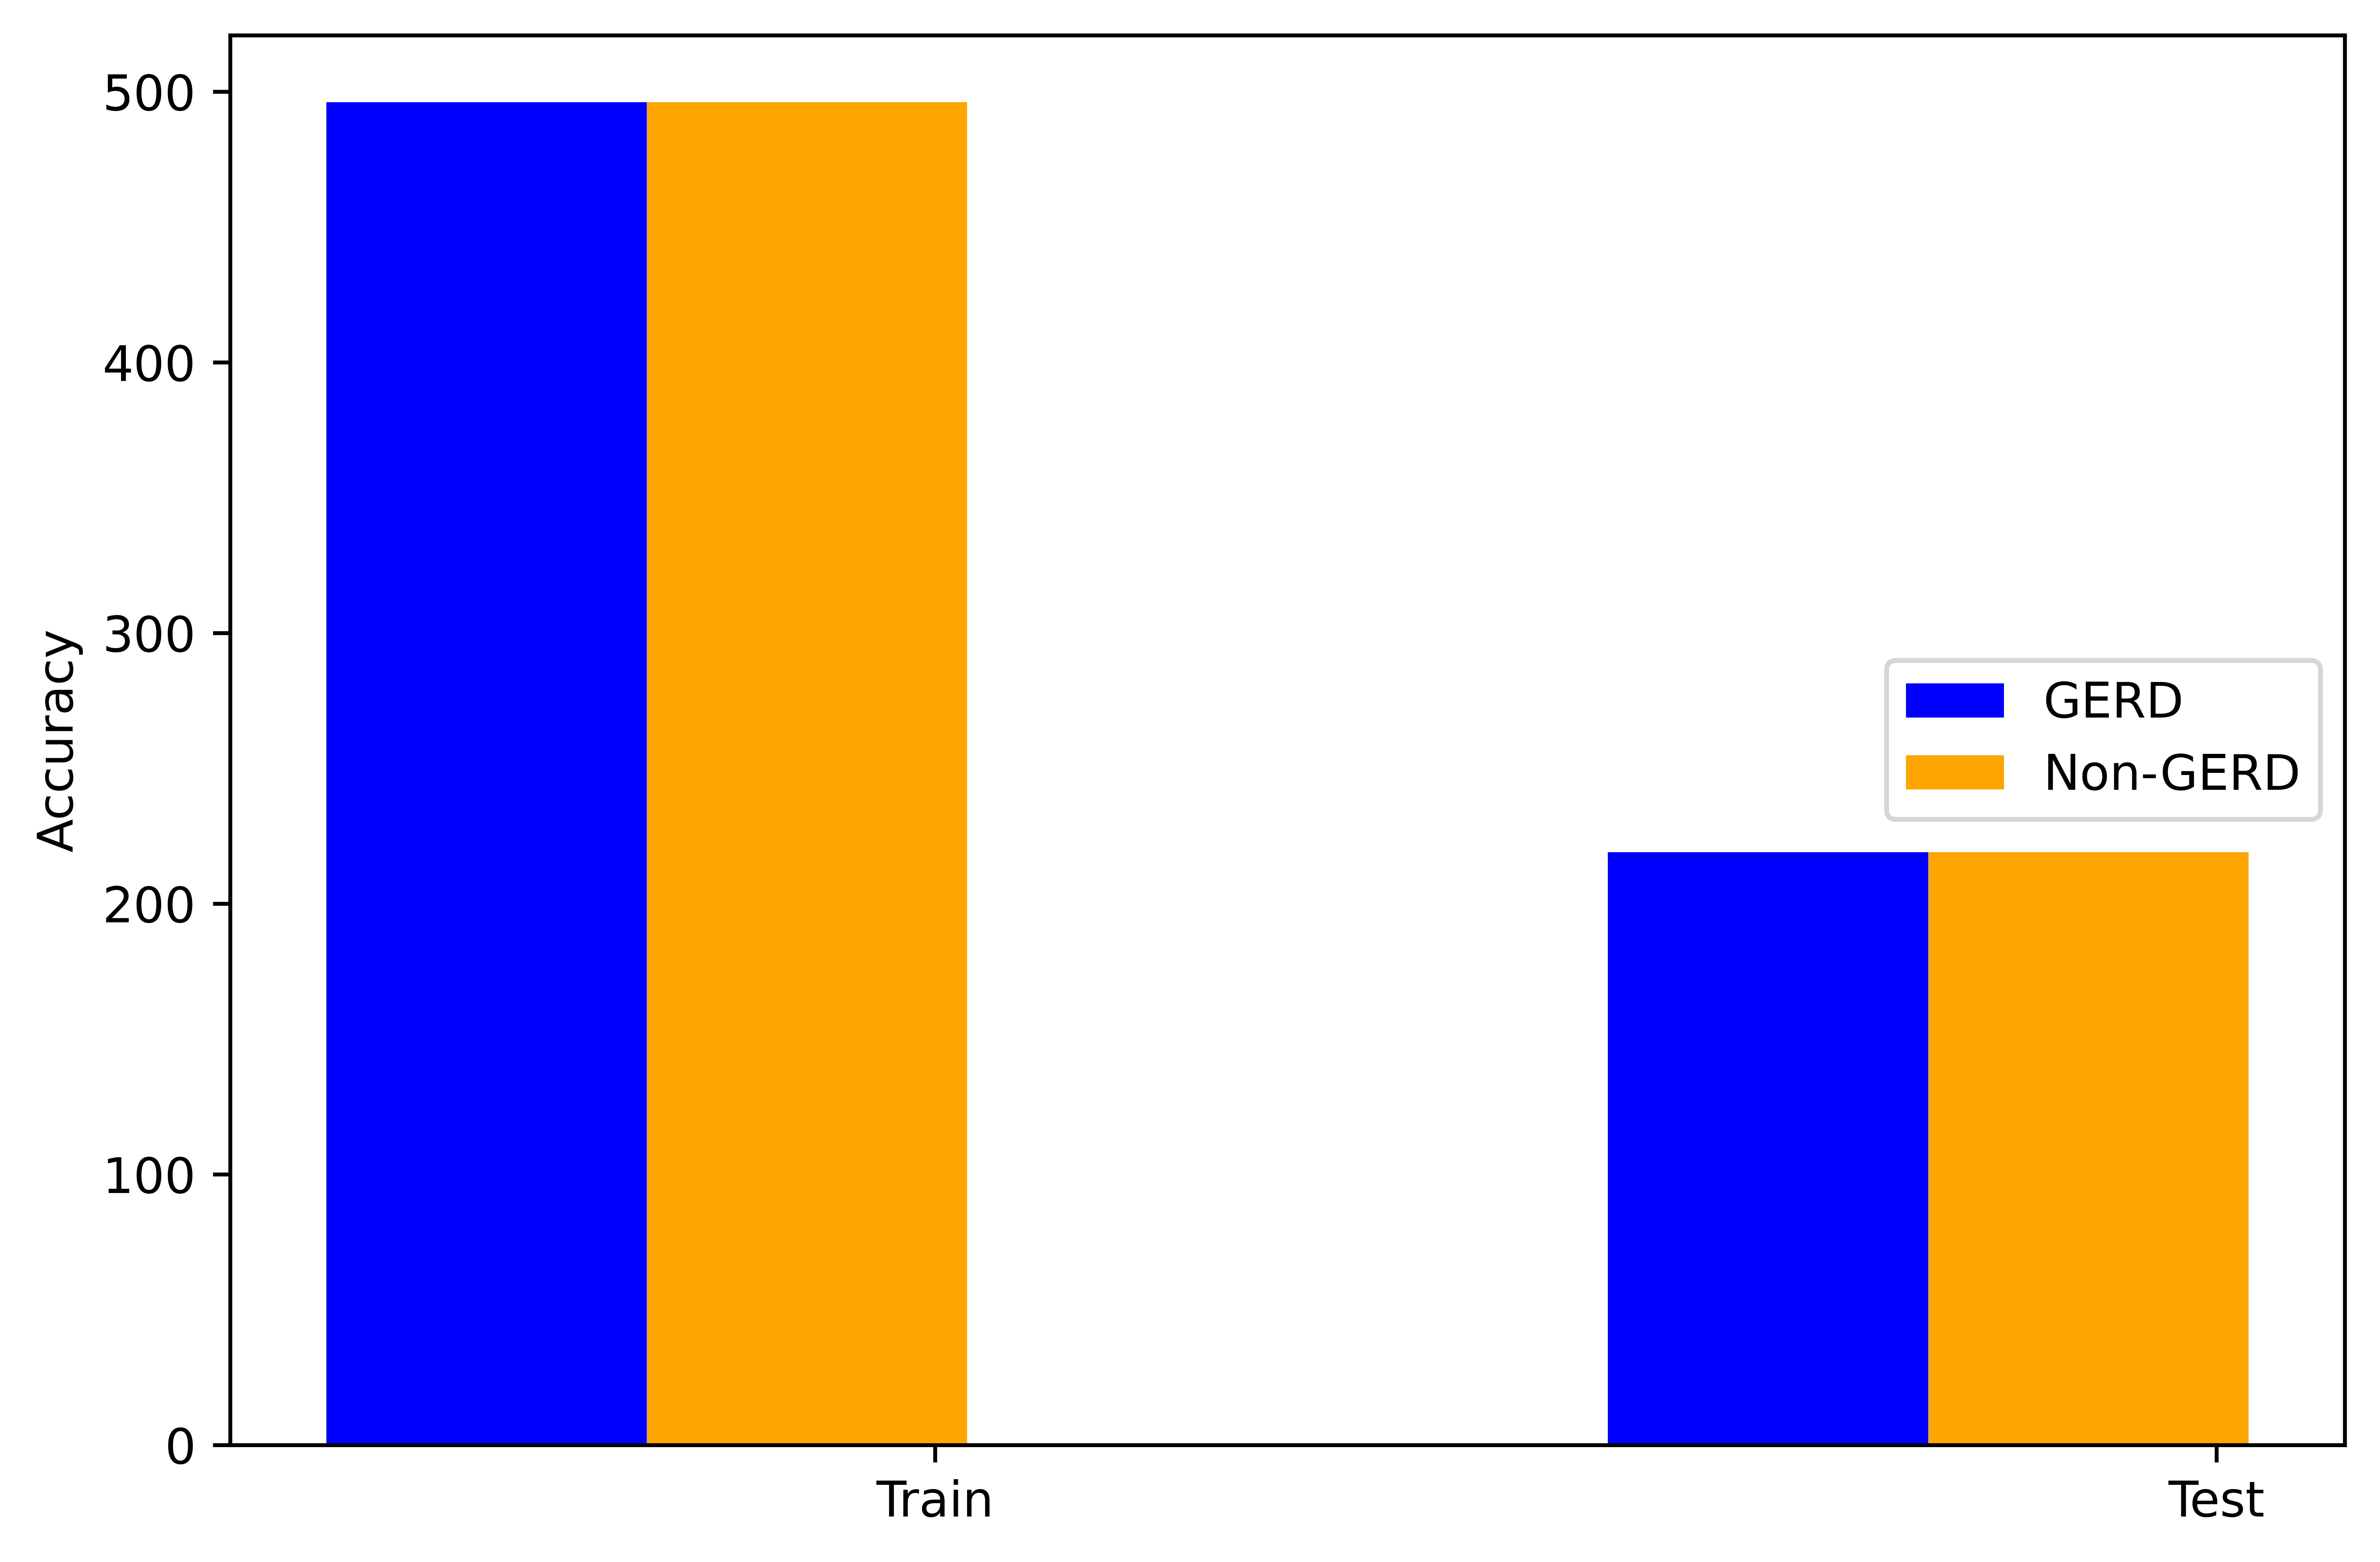

In [50]:

# train['condition'].value_counts().plot(kind='bar')
import numpy as np
import matplotlib.pyplot as plt

data = [[train_count['counts'][1],[test_count['counts'][1]]],
        [train_count['counts'][0],[test_count['counts'][0]]]]

print(data)

X = np.arange(2)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_width = 0.35

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label='GERD')
ax.bar(X + 0.25, data[1], color = 'orange', width = 0.25, label='Non-GERD')

ax.set_ylabel('Accuracy')
ax.legend(loc=7)
plt.gcf().set_dpi(1000)
plt.xticks(X + bar_width, ('Train', 'Test'))
# plt.title("Number of Data in ea")

In [51]:
!pip install matplotlib==3.4.2

In [52]:
from matplotlib import ticker
import math
xlabels = ['train','test'] 
ylabels = np.arange(0, 600, 100)


akurasi_1 = [train_count['counts'][1],test_count['counts'][1]] 
akurasi_2 = [train_count['counts'][0],test_count['counts'][0]] 

x = np.arange(len(xlabels))  # yang ini ga usah di ubah
width = 0.35  # lebar bar

fig, ax = plt.subplots(figsize=(10,8))
plt.gcf().set_dpi(1000)
rects2 = ax.bar(x - width/2, akurasi_1, width, label='GERD', color='b')
rects3 = ax.bar(x + width/2, akurasi_2, width, label='Non-GERD', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Data', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(xlabels, fontsize=12)
# ax.set_yticklabels(ylabels, fontsize=12)
ax.legend(fontsize=12, loc=1)

# ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.bar_label(rects2, padding=3, fontsize=11)
ax.bar_label(rects3, padding=3, fontsize=11)

plt.show()

###Download

In [53]:
from google.colab import files

train.to_csv('train_preprocessed.csv')
files.download('train_preprocessed.csv')
test.to_csv('test_preprocessed.csv')
files.download('test_preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>